<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/Exercicio_regressao_linear_simples_Pedro_Paulo_Cacioli_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esta atividade iremos usar um conjunto de dados sobre preços de imóveis. O conjunto original pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). Os dados que usaremos foram alterados para facilitar as análises.

# Regressão Linear Simples

## Atividade 1: Importe os dados e verifique se há dados faltantes.

In [ ]:
import pandas as pd

In [ ]:
url='https://docs.google.com/spreadsheets/d/1v8Ygt3WVZ1z-WxpmTXgIUrJ_l09zNPvi/edit#gid=690350466'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   preco                            5891 non-null   int64  
 1   ano_construcao                   5891 non-null   int64  
 2   ano_Venda                        5891 non-null   int64  
 3   m2                               5891 non-null   float64
 4   andar                            5891 non-null   int64  
 5   tipo_Aquecimento                 5891 non-null   object 
 6   tempo_ate_onibus                 5891 non-null   object 
 7   tempo_ate_metro                  5891 non-null   object 
 8   qtde_elevadores                  5891 non-null   int64  
 9   qtde_escritorios_publicos_perto  5891 non-null   int64  
 10  qtde_hospitais_perto             5891 non-null   int64  
 11  qtde_lojas_departamento_perto    5891 non-null   int64  
 12  qtde_shoppings_perto

## Atividade 2: Selecione apenas as variáveis `preco` e `m2`, aplique o logaritmo natural na variável `m2` e verifique a correlação entre as variáveis.

In [ ]:
df_selecionado = df[['preco','m2']]

In [ ]:
import numpy as np

#Aplicado o log para que os pressupostos sejam atendidos

df_selecionado['m2'] = np.log(df_selecionado['m2'])

<ipython-input-17-8e2b9adcdf37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['m2'] = np.log(df_selecionado['m2'])


In [ ]:
df_selecionado.corr()

,preco,m2
preco,1.000000,0.706048
m2,0.706048,1.000000


## Atividade 3: Crie um modelo de regressão linear simples e encontre os coeficientes do modelo.

In [ ]:
# importando statsmodels
import statsmodels.api as sm

# separando as variáveis X e y
X = df_selecionado['preco']
y = df_selecionado['m2']

# adicionando o termo constante ao modelo
X = sm.add_constant(X)

# estimando o modelo de regressão linear
modelo1 = sm.OLS(y, X).fit()

# obtendo estatísticas sobre o modelo
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                     m2   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:26:45   Log-Likelihood:                -1249.7
No. Observations:                5891   AIC:                             2503.
Df Residuals:                    5889   BIC:                             2517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7835      0.009    420.604      0.0

Y = 3,7835 + 0,00000004673X

In [ ]:
modelo1.params

const    3.783517e+00
preco    4.673069e-07
dtype: float64

## Atividade 4: Verifique os pressupostos da regressão linear.

In [ ]:
# prevendo valores para X
y_pred1 = modelo1.predict(X)

# calculando os resíduos
res1 = y - y_pred1

Linearidade

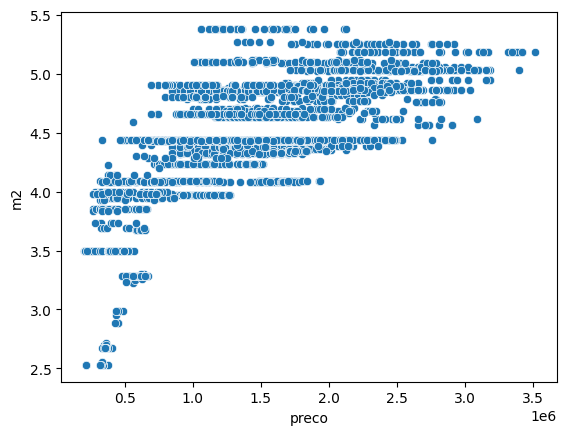

In [ ]:
import seaborn as sns

sns.scatterplot(data=df_selecionado, x='preco', y='m2');

Homocedasticidade

Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt. Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

Neste teste, a hipótese nula é de que há homocedasticidade.

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt

stat, p_valor, _ = het_goldfeldquandt(res1, X)
p_valor

1.4201150402749108e-54

p-valor é menor do que 0.05, portanto, a hipótese nula é rejeitada,ou seja, não há homocedasticidade

Normalidade dos Resíduos

Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Shapiro-Wilk. Neste caso, a hipótese nula é que a amostra segue distribuição normal. Podemos realizar este teste importando a função `scipy.stats.shapiro()`.

In [ ]:
from scipy.stats import shapiro

stat, p_valor = shapiro(res1)
p_valor

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


3.263343863719634e-41

p-valor é menor do que 0.05, portanto, a hipótese nula é rejeitada,ou seja, não há uma distribuição normal

Autocorrelação dos Resíduos

Para checar se há autocorrelação entre os resíduos vamos usar o teste de hipótese de Durbin Watson. Ele pode ser importado do `statsmodels` com a sintaxe `statsmodels.stats.stattolls.durbin_watons()`.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res1)

1.1145739077880175

O valor é menor do que 1.5, o que indica que há correlação

Para decidirmor se há ou não autocorrelação dos resíduos, devemos observar o valor do teste. Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação.

Multicolinearidade



In [ ]:
# Como só há um valor de X, não faz sentido calcular multicolinearidade

# Regressão Linear Múltipla

## Atividade 5: Crie um modelo de regressão linear múltipla.

Para facilitar o trabalho, vamos deixar um pré processamento pronto.

In [ ]:
# importando os dados

df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [ ]:
# Vamos condensar algumas variáveis em uma única
df['qtde_servicos'] = df['qtde_hospitais_perto'] + \
                      df['qtde_lojas_departamento_perto'] + \
                      df['qtde_escritorios_publicos_perto'] + \
                      df['qtde_escolas_fundamental1_perto'] + \
                      df['qtde_escolas_fundamental2_perto'] + \
                      df['qtde_escolas_medio_perto'] + \
                      df['qtde_universidades_perto']

# excluindo as variáveis originais do DataFrame
df.drop(['qtde_hospitais_perto','qtde_lojas_departamento_perto',
         'qtde_escritorios_publicos_perto','qtde_escolas_fundamental1_perto',
         'qtde_escolas_fundamental2_perto','qtde_escolas_medio_perto',
         'qtde_universidades_perto'],
        axis=1, inplace=True)

In [ ]:
# criando nova variável
df['qtde_conveniencia'] = df['qtde_shoppings_perto'] + df['qtde_estacionamentos_perto']

# excluindo variáveis do DataFrame
df.drop(['qtde_shoppings_perto','qtde_estacionamentos_perto'],
        axis=1, inplace=True)

df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_servicos,qtde_conveniencia
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,13,1
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,12,2
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,12,2
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,9,1
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,25,1


In [ ]:
# aplicando One Hot Encoding à variável tipo_Aquecimento
df_aux = pd.get_dummies(df['tipo_Aquecimento'], prefix='tipo_Aquecimento')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tipo_Aquecimento', 'tipo_Aquecimento_central'], axis=1, inplace=True)

In [ ]:
# aplicando One Hot Encoding à variável tempo_ate_onibus
df_aux = pd.get_dummies(df['tempo_ate_onibus'], prefix='tempo_ate_onibus')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_onibus', 'tempo_ate_onibus_10min~15min'], axis=1, inplace=True)

In [ ]:
# aplicando One Hot Encoding à variável tempo_ate_metro
df_aux = pd.get_dummies(df['tempo_ate_metro'], prefix='tempo_ate_metro')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_metro', 'tempo_ate_metro_no_bus_stop_nearby'], axis=1, inplace=True)
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,1,0,1,0,1,0,0
1,307962,1985,2007,54.534061,8,2,12,2,1,1,0,0,0,0,1
2,292032,1985,2007,54.534061,6,2,12,2,1,1,0,0,0,0,1
3,2283180,2006,2007,191.008568,8,11,9,1,1,1,0,1,0,0,0
4,1327428,1993,2007,163.602183,3,20,25,1,1,1,0,0,0,1,0


In [ ]:
# separando os dados em X e y
X = df.drop('preco', axis=1)
y = df['preco']

In [ ]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
X_scaled = X.copy()

# aplicando a padronização
X_scaled[X_scaled.columns] = scaler.fit_transform(X_scaled)

X_scaled.head()

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-1.806284,1.854545,-0.938566,2.511759,-0.439310,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
2,-2.039194,-1.959067,-0.963752,-0.798388,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
3,0.344181,-1.959067,2.877458,-0.533420,-0.018703,-1.413592,-0.772684,0.231641,0.553623,-0.539216,1.065455,-0.398127,-0.439310,-0.488514
4,-1.131242,-1.959067,2.106078,-1.195839,1.134320,1.345276,-0.772684,0.231641,0.553623,-0.539216,-0.938566,-0.398127,2.276298,-0.488514


Criando o modelo de regressão

In [ ]:
# Adicionando a constante ao modelo de regressão linear múltipla
X2 = sm.add_constant(X_scaled)

# Ajustando o modelo
modelo2 = sm.OLS(y, X2).fit()

# Exibindo os resultados
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:26:06   Log-Likelihood:                -81941.
No. Observations:                5891   AIC:                         1.639e+05
Df Residuals:                    5876   BIC:                         1.640e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

O R² é de 0.827, ou seja, está prevendo melhor o modelo

## Atividade 6: Faça a previsão do preço de um apartamento com as seguinte características:
ano_construcao = 2000

ano_Venda = 2003

m2 = 83

andar = 2

qtde_elevadores = 1

qtde_servicos = 4

qtde_conveniencia = 2

tipo_Aquecimento_individual = 1

tempo_ate_onibus_0~5min = 0

tempo_ate_onibus_5min~10min = 1

tempo_ate_metro_0-5min = 1

tempo_ate_metro_10min~15min = 0

tempo_ate_metro_15min~20min = 0

tempo_ate_metro_5min~10min = 0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Encontrando VIF para cada variável
#VIF = []
VIF = [variance_inflation_factor(X2.values, i) for i in range(X.shape[1])]

array_coef = [] # criado para armazenar os coefs para calcular posteriormente

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
  print(f'{X_scaled.columns[indice]}: {vif}')
  array_coef.append(VIF)

ano_construcao: 1.000000000000002
ano_Venda: 2.8769439253776743
m2: 1.2074901489750312
andar: 1.5790474186140362
qtde_elevadores: 1.1770457683797
qtde_servicos: 2.9233278102510476
qtde_conveniencia: 2.448935745707548
tipo_Aquecimento_individual: 1.6080686093925656
tempo_ate_onibus_0~5min: 4.381063755907036
tempo_ate_onibus_5min~10min: 24.535240105582353
tempo_ate_metro_0-5min: 23.55155044796696
tempo_ate_metro_10min~15min: 8.837772704107909
tempo_ate_metro_15min~20min: 7.932944735408352
tempo_ate_metro_5min~10min: 8.04640147760748


In [ ]:
valores = [2000, 2003, 83, 2, 1, 4, 2, 1, 0, 1, 1, 0, 0, 0]
preco = 0
index = 0

for coeficiente in array_coef:
  preco+= coeficiente[index] * valores[index]
  index+=1


print('O valor do imóvel para os coeficientes é: ', preco)

O valor do imóvel para os coeficientes é:  7933.361547397382


## Atividade 7: Verifique os pressupostos do modelo.

In [ ]:
# prevendo valores para X
y_pred2 = modelo2.predict(X2)

# calculando os resíduos
res2 = y - y_pred2

Homocedasticidade dos Resíduos

In [ ]:
stat, p_valor, _ = het_goldfeldquandt(res2, X2)
p_valor

1.1901268230241252e-57

Não tem distribuição normal, pois a hipótese nula é rejeitada, dado que o p valor < 0.05

Normalidade dos Resíduos

In [ ]:
# seu código

Autocorrelação dos Resíduos

In [ ]:
durbin_watson(res2)

0.9769517207167945

Tem autocorrelação, pois o valor é menor que 1.5

Multicolinearidade

tempo_ate_onibus_5min~10min: 24.535240105582353

tempo_ate_metro_0-5min: 23.55155044796696

Apresentam multicolinearidade, pois o VIF >10

## Atividade 7: Avalie e compare ambos os modelos e decida qual é melhor.

In [ ]:
print(f"Modelo1: R2 = {modelo1.rsquared}, R2 Ajustado = {modelo1.rsquared_adj}")
print(f"Modelo2: R2 = {modelo2.rsquared}, R2 Ajustado = {modelo2.rsquared_adj}")

Modelo1: R2 = 0.4985037705616263, R2 Ajustado = 0.498418612431309
Modelo2: R2 = 0.8265485207255558, R2 Ajustado = 0.8261352598831728


A variável X do modelo 2 explica 82,65%, enquanto no modelo 1, explica 49,85%

In [ ]:
from statsmodels.tools.eval_measures import mse

print(f"MSE Modelo1: {mse(y, res1)}")
print(f"MSE Modelo2: {mse(y, res2)}")

MSE Modelo1: 2169112581955.7854
MSE Modelo2: 2098454648018.7969


Erro do modelo 2 < erro modelo 1

In [ ]:
from statsmodels.tools.eval_measures import meanabs

print(f'MAE Modelo1: {meanabs(y, res1)}')
print(f'MAE Modelo2: {meanabs(y, res2)}')

MAE Modelo1: 1327308.675267357
MAE Modelo2: 1327392.9153251608


Os valores são próximos, porém o modelo 1 apresenta um erro absoluto médio menor.

Analisando todas as métricas em conjunto, vemos que o modelo 2 apresenta melhor previsão.